# MSCFE 610 - Financial Econometrics: Group Work Project \#1 Report for Group 12188

#Author: David Olutunde Daniel, Pratyush Mathur

Problem 1d

=== Sample Size n=50 ===
Full model coefficient for X: 0.5036
Omitted model coefficient for X: 0.7584
Bias: 0.2548
True β = 0.5

=== Sample Size n=500 ===
Full model coefficient for X: 0.4996
Omitted model coefficient for X: 0.7669
Bias: 0.2673
True β = 0.5


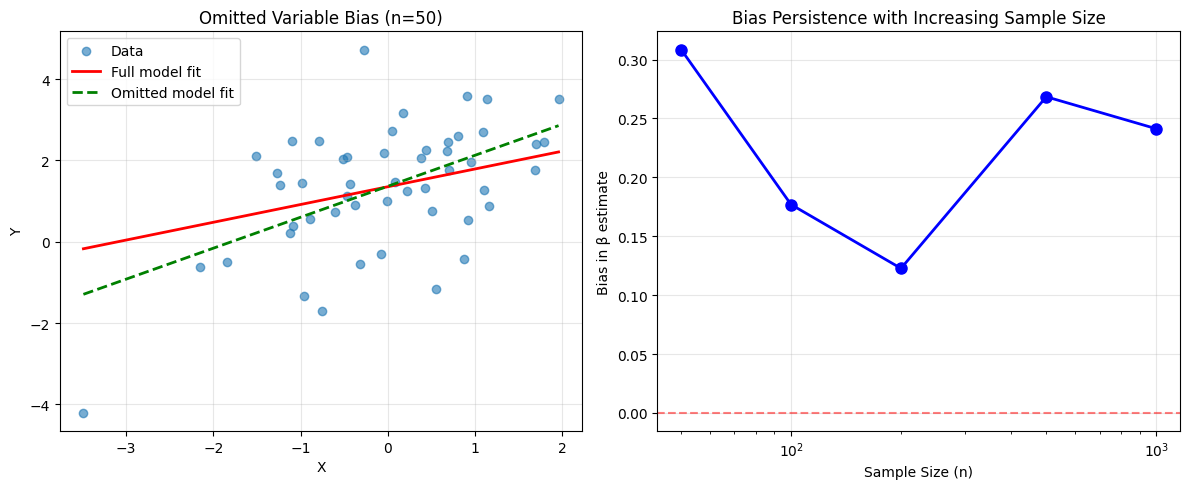


SUMMARY TABLE
 Sample Size  Full Model β̂  Omitted Model β̂     Bias  True β
          50       0.503577          0.758396 0.254819     0.5
         500       0.499605          0.766946 0.267342     0.5


In [11]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(610)

# Function to run simulation for a given sample size
def simulate_omitted_variable_bias(n):
    # Generate correlated predictors
    X = np.random.randn(n)
    Z = 0.3 * X + np.random.randn(n)  # Z is correlated with X
    # True model: Y = 1 + 0.5X + 0.8Z + ε
    epsilon = np.random.randn(n)
    Y = 1 + 0.5 * X + 0.8 * Z + epsilon

    # Full model with both X and Z
    X_full = sm.add_constant(np.column_stack((X, Z)))
    model_full = sm.OLS(Y, X_full).fit()
    b_full = model_full.params[1]  # Coefficient for X

    # Omitted model (Z omitted)
    X_om = sm.add_constant(X)
    model_om = sm.OLS(Y, X_om).fit()
    b_om = model_om.params[1]  # Coefficient for X

    return b_full, b_om, model_full, model_om

# Run for n=50
print("=== Sample Size n=50 ===")
b_full_50, b_om_50, model_full_50, model_om_50 = simulate_omitted_variable_bias(50)
print(f"Full model coefficient for X: {b_full_50:.4f}")
print(f"Omitted model coefficient for X: {b_om_50:.4f}")
print(f"Bias: {b_om_50 - b_full_50:.4f}")
print(f"True β = 0.5")

# Run for n=500
print("\n=== Sample Size n=500 ===")
b_full_500, b_om_500, model_full_500, model_om_500 = simulate_omitted_variable_bias(500)
print(f"Full model coefficient for X: {b_full_500:.4f}")
print(f"Omitted model coefficient for X: {b_om_500:.4f}")
print(f"Bias: {b_om_500 - b_full_500:.4f}")
print(f"True β = 0.5")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for n=50
n = 50
X = np.random.randn(n)
Z = 0.3 * X + np.random.randn(n)
epsilon = np.random.randn(n)
Y = 1 + 0.5 * X + 0.8 * Z + epsilon

# Fit models
X_full = sm.add_constant(np.column_stack((X, Z)))
model_full = sm.OLS(Y, X_full).fit()
X_om = sm.add_constant(X)
model_om = sm.OLS(Y, X_om).fit()

# Generate predicted values
X_range = np.linspace(X.min(), X.max(), 100)
# For full model, need to assume average Z value
Z_mean = Z.mean()
Y_pred_full = model_full.params[0] + model_full.params[1] * X_range + model_full.params[2] * Z_mean
Y_pred_om = model_om.params[0] + model_om.params[1] * X_range

axes[0].scatter(X, Y, alpha=0.6, label='Data')
axes[0].plot(X_range, Y_pred_full, 'r-', linewidth=2, label='Full model fit')
axes[0].plot(X_range, Y_pred_om, 'g--', linewidth=2, label='Omitted model fit')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title(f'Omitted Variable Bias (n={n})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot bias vs sample size
sample_sizes = [50, 100, 200, 500, 1000]
biases = []
for size in sample_sizes:
    b_full, b_om, _, _ = simulate_omitted_variable_bias(size)
    biases.append(b_om - b_full)

axes[1].plot(sample_sizes, biases, 'bo-', linewidth=2, markersize=8)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Sample Size (n)')
axes[1].set_ylabel('Bias in β estimate')
axes[1].set_title('Bias Persistence with Increasing Sample Size')
axes[1].grid(True, alpha=0.3)
axes[1].set_xscale('log')

plt.tight_layout()
plt.savefig('problem1_omitted_variable.png', dpi=300, bbox_inches='tight')
plt.show()

# Create summary table
summary_df = pd.DataFrame({
    'Sample Size': [50, 500],
    'Full Model β̂': [b_full_50, b_full_500],
    'Omitted Model β̂': [b_om_50, b_om_500],
    'Bias': [b_om_50 - b_full_50, b_om_500 - b_full_500],
    'True β': [0.5, 0.5]
})
print("\n" + "="*60)
print("SUMMARY TABLE")
print("="*60)
print(summary_df.to_string(index=False))

Problem 2b

OUTLIER EFFECT ANALYSIS
True parameters: α = 2, β = 0.5

Clean data (no outliers):
  α̂ = 2.0126, β̂ = 0.4942
  R² = 0.5014

Data with outliers:
  α̂ = 2.0872, β̂ = 0.8214
  R² = 0.5622
  Change in β: 0.3272 (66.2%)

Robust regression (Huber):
  α̂ = 2.0069, β̂ = 0.5757

Outlier diagnostics:
  Point 20: Cook's D = 2.5038, Studentized residual = 5.4000
  Point 50: Cook's D = 0.3730, Studentized residual = 6.3519
  Point 80: Cook's D = 0.3235, Studentized residual = -2.2168


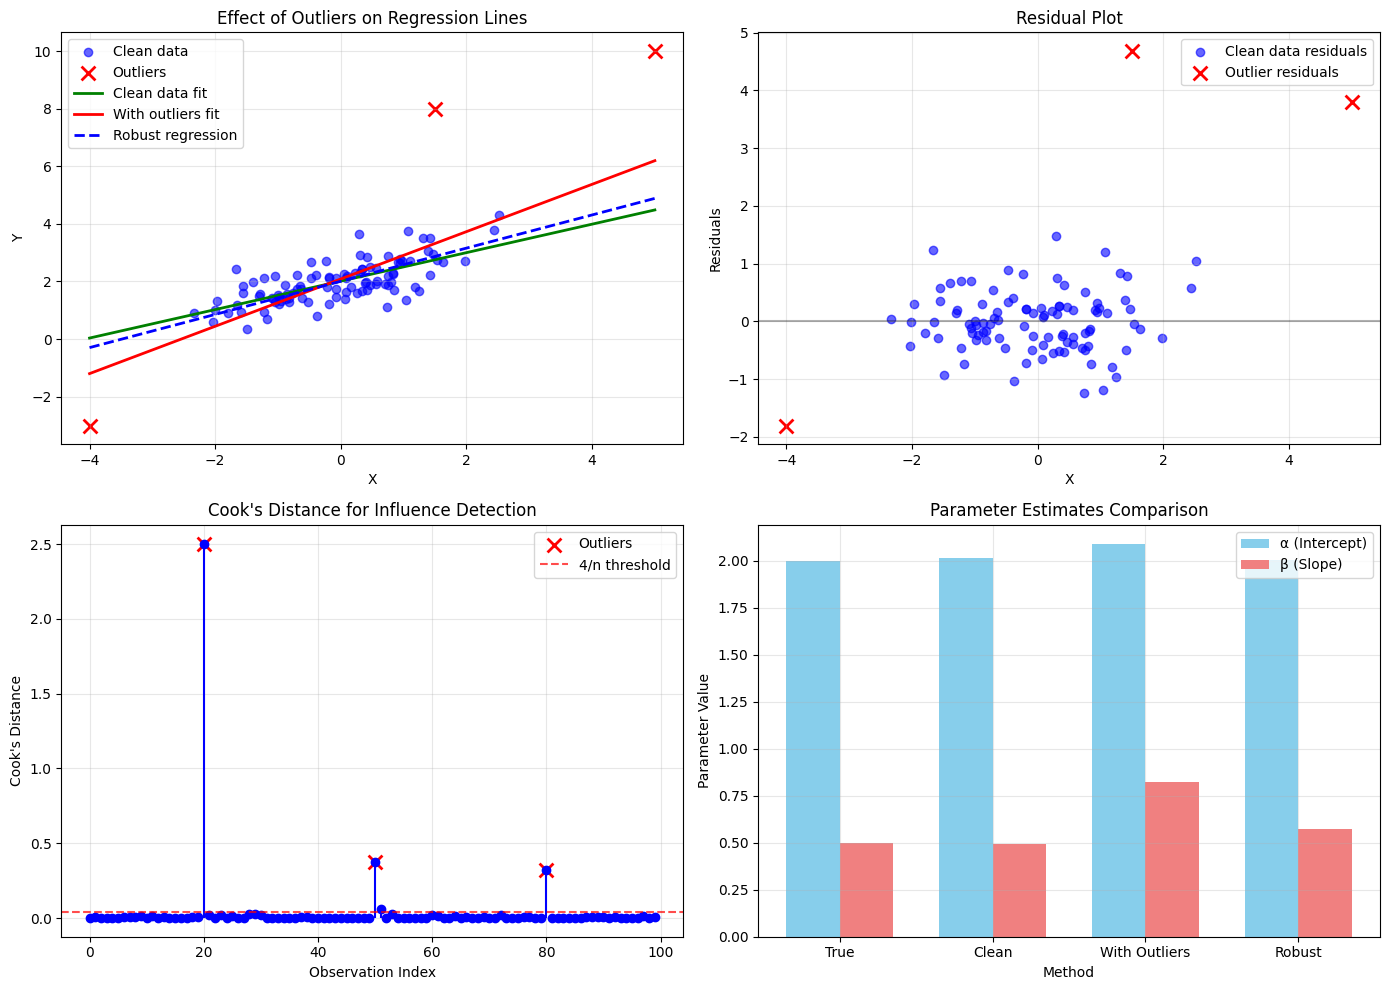


SENSITIVITY TO OUTLIER MAGNITUDE
Outlier magnitude 1σ: β̂ = 0.5153 (Δ = +0.0211)
Outlier magnitude 3σ: β̂ = 0.5420 (Δ = +0.0477)
Outlier magnitude 5σ: β̂ = 0.5686 (Δ = +0.0744)
Outlier magnitude 10σ: β̂ = 0.6352 (Δ = +0.1410)


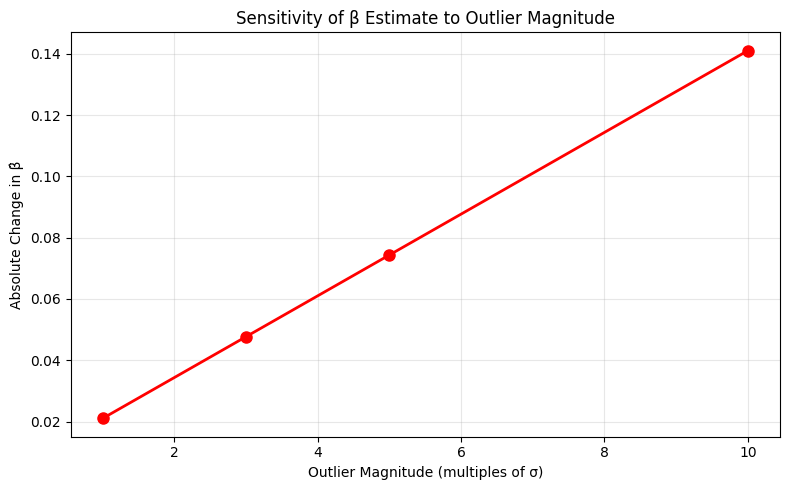

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(610)

# Generate clean data
n = 100
X_clean = np.random.randn(n)
true_beta = 0.5
true_alpha = 2
epsilon = np.random.randn(n) * 0.5
Y_clean = true_alpha + true_beta * X_clean + epsilon

# Introduce outliers at specific indices
X_with_outliers = X_clean.copy()
Y_with_outliers = Y_clean.copy()

# Add three types of outliers
outlier_indices = [20, 50, 80]
# High leverage point (extreme X)
X_with_outliers[20] = 5
Y_with_outliers[20] = 10
# Vertical outlier (extreme Y)
X_with_outliers[50] = 1.5
Y_with_outliers[50] = 8
# Influential point (both extreme)
X_with_outliers[80] = -4
Y_with_outliers[80] = -3

# Fit regression on clean data
Xc_clean = sm.add_constant(X_clean)
model_clean = sm.OLS(Y_clean, Xc_clean).fit()
beta_clean = model_clean.params[1]
alpha_clean = model_clean.params[0]

# Fit regression on data with outliers
Xc_out = sm.add_constant(X_with_outliers)
model_out = sm.OLS(Y_with_outliers, Xc_out).fit()
beta_out = model_out.params[1]
alpha_out = model_out.params[0]

# Fit robust regression using Huber loss
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(epsilon=1.35)  # Default epsilon for 95% efficiency
huber.fit(X_with_outliers.reshape(-1, 1), Y_with_outliers)
beta_huber = huber.coef_[0]
alpha_huber = huber.intercept_

# Calculate diagnostics
# Cook's distance
influence = model_out.get_influence()
cooks_d = influence.cooks_distance[0]

# Studentized residuals
resid_studentized = influence.resid_studentized_external

print("="*60)
print("OUTLIER EFFECT ANALYSIS")
print("="*60)
print(f"True parameters: α = {true_alpha}, β = {true_beta}")
print(f"\nClean data (no outliers):")
print(f"  α̂ = {alpha_clean:.4f}, β̂ = {beta_clean:.4f}")
print(f"  R² = {model_clean.rsquared:.4f}")

print(f"\nData with outliers:")
print(f"  α̂ = {alpha_out:.4f}, β̂ = {beta_out:.4f}")
print(f"  R² = {model_out.rsquared:.4f}")
print(f"  Change in β: {abs(beta_out - beta_clean):.4f} ({abs((beta_out - beta_clean)/beta_clean)*100:.1f}%)")

print(f"\nRobust regression (Huber):")
print(f"  α̂ = {alpha_huber:.4f}, β̂ = {beta_huber:.4f}")

print(f"\nOutlier diagnostics:")
for idx in outlier_indices:
    print(f"  Point {idx}: Cook's D = {cooks_d[idx]:.4f}, Studentized residual = {resid_studentized[idx]:.4f}")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Data and regression lines
axes[0, 0].scatter(X_clean, Y_clean, alpha=0.6, label='Clean data', color='blue')
axes[0, 0].scatter(X_with_outliers[outlier_indices], Y_with_outliers[outlier_indices],
                   color='red', s=100, marker='x', linewidth=2, label='Outliers')

# Generate prediction lines
X_range = np.linspace(X_with_outliers.min(), X_with_outliers.max(), 100)
Y_pred_clean = alpha_clean + beta_clean * X_range
Y_pred_out = alpha_out + beta_out * X_range
Y_pred_huber = alpha_huber + beta_huber * X_range

axes[0, 0].plot(X_range, Y_pred_clean, 'g-', linewidth=2, label='Clean data fit')
axes[0, 0].plot(X_range, Y_pred_out, 'r-', linewidth=2, label='With outliers fit')
axes[0, 0].plot(X_range, Y_pred_huber, 'b--', linewidth=2, label='Robust regression')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].set_title('Effect of Outliers on Regression Lines')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals vs X
resid_clean = Y_clean - model_clean.predict(Xc_clean)
resid_out = Y_with_outliers - model_out.predict(Xc_out)

axes[0, 1].scatter(X_clean, resid_clean, alpha=0.6, label='Clean data residuals', color='blue')
axes[0, 1].scatter(X_with_outliers[outlier_indices], resid_out[outlier_indices],
                   color='red', s=100, marker='x', linewidth=2, label='Outlier residuals')
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Cook's distance
axes[1, 0].stem(range(n), cooks_d, linefmt='b-', markerfmt='bo', basefmt=' ')
axes[1, 0].scatter(outlier_indices, cooks_d[outlier_indices],
                   color='red', s=100, marker='x', linewidth=2, label='Outliers')
axes[1, 0].axhline(y=4/n, color='r', linestyle='--', alpha=0.7, label='4/n threshold')
axes[1, 0].set_xlabel('Observation Index')
axes[1, 0].set_ylabel("Cook's Distance")
axes[1, 0].set_title("Cook's Distance for Influence Detection")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Parameter estimates comparison
methods = ['True', 'Clean', 'With Outliers', 'Robust']
alpha_vals = [true_alpha, alpha_clean, alpha_out, alpha_huber]
beta_vals = [true_beta, beta_clean, beta_out, beta_huber]

x_pos = np.arange(len(methods))
width = 0.35

axes[1, 1].bar(x_pos - width/2, alpha_vals, width, label='α (Intercept)', color='skyblue')
axes[1, 1].bar(x_pos + width/2, beta_vals, width, label='β (Slope)', color='lightcoral')
axes[1, 1].set_xlabel('Method')
axes[1, 1].set_ylabel('Parameter Value')
axes[1, 1].set_title('Parameter Estimates Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(methods)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('problem2_outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis: Effect of outlier magnitude
print("\n" + "="*60)
print("SENSITIVITY TO OUTLIER MAGNITUDE")
print("="*60)

outlier_magnitudes = [1, 3, 5, 10]
beta_changes = []

for magnitude in outlier_magnitudes:
    X_test = X_clean.copy()
    Y_test = Y_clean.copy()
    # Add outlier at position 50
    X_test[50] = 3
    Y_test[50] = true_alpha + true_beta * 3 + magnitude * epsilon.std()

    Xc_test = sm.add_constant(X_test)
    model_test = sm.OLS(Y_test, Xc_test).fit()
    beta_test = model_test.params[1]
    beta_changes.append(abs(beta_test - beta_clean))

    print(f"Outlier magnitude {magnitude}σ: β̂ = {beta_test:.4f} (Δ = {beta_test - beta_clean:+.4f})")

# Plot sensitivity
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(outlier_magnitudes, beta_changes, 'ro-', linewidth=2, markersize=8)
ax.set_xlabel('Outlier Magnitude (multiples of σ)')
ax.set_ylabel('Absolute Change in β̂')
ax.set_title('Sensitivity of β Estimate to Outlier Magnitude')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('problem2_sensitivity.png', dpi=300, bbox_inches='tight')
plt.show()

Problem 3

DATASET EXPLORATION
Dataset shape: (100, 6)

First 5 rows:
          Y        X1        X2        X3        X4        X5
0  3.388410  0.017954 -0.800583 -0.352454  2.187210  1.014887
1  0.287191  0.083057 -0.597947 -0.357639 -1.630284  0.221841
2  3.989645 -0.923437 -1.386575  1.180202  0.632606 -1.576638
3 -2.959602 -0.313775  2.955133 -1.798692 -2.117621  0.159291
4  0.529773  0.388996  1.019611  0.472062  0.590497  0.877048

Data types:
Y     float64
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
dtype: object

Missing values:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

Summary statistics:
                Y          X1          X2          X3          X4          X5
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean     1.257388    0.026830    0.084613   -0.016037    0.122374   -0.201661
std      1.436655    0.481708    0.962145    0.976559    1.076935    1.073358
min     -2.959602   -1.275230   -2.041959   -2.

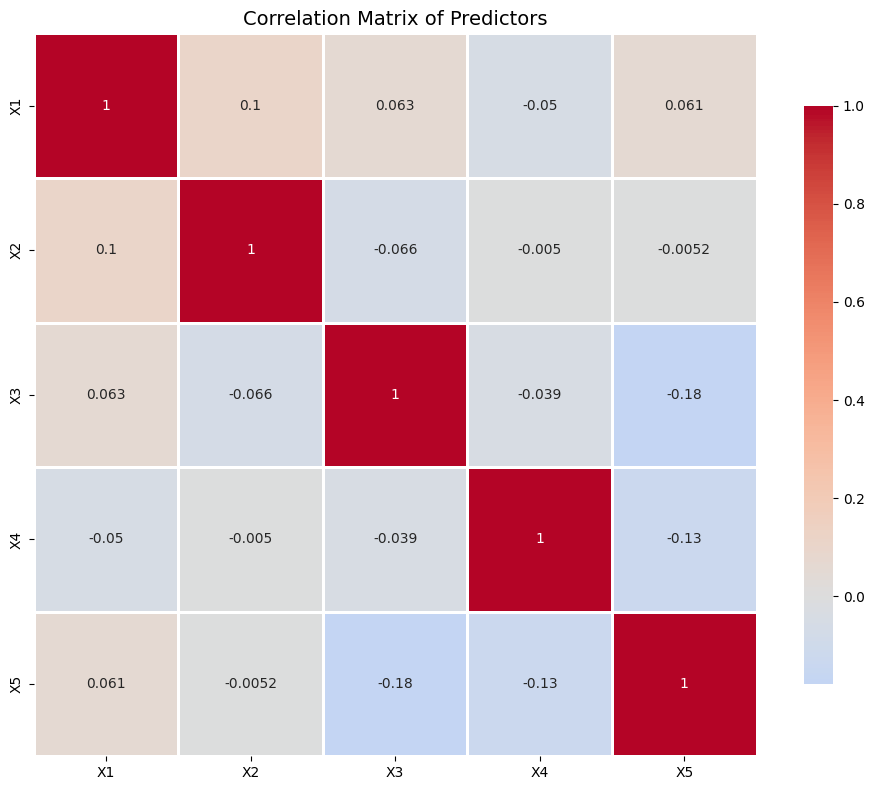


Correlation with target variable Y:
  Variable  Correlation_with_Y
3       X4            0.538308
1       X2           -0.419326
2       X3            0.411351
4       X5           -0.279807
0       X1           -0.061400

Training set size: 80
Test set size: 20

2. MODEL SELECTION APPROACH 1: STEPWISE SELECTION WITH BIC
Iteration 1: Adding 'X4', BIC = 266.44
Iteration 2: Adding 'X3', BIC = 243.48
Iteration 3: Adding 'X2', BIC = 216.63

Final selected variables (BIC): ['X4', 'X3', 'X2']
Final BIC: 216.63

BIC-selected model R²: 0.6669
BIC-selected model Adjusted R²: 0.6537
BIC-selected model AIC: 207.10

3. MODEL SELECTION APPROACH 2: LASSO WITH CROSS-VALIDATION
Selected variables (Lasso): ['X1', 'X2', 'X3', 'X4', 'X5']
Optimal alpha: 0.032554

Lasso coefficients:
  X1: -0.013998
  X2: -0.553202
  X3: 0.560856
  X4: 0.769118
  X5: -0.142656

Lasso-OLS model R²: 0.6794
Lasso-OLS model Adjusted R²: 0.6578

4. MODEL SELECTION APPROACH 3: BEST SUBSETS REGRESSION

Best models by different 

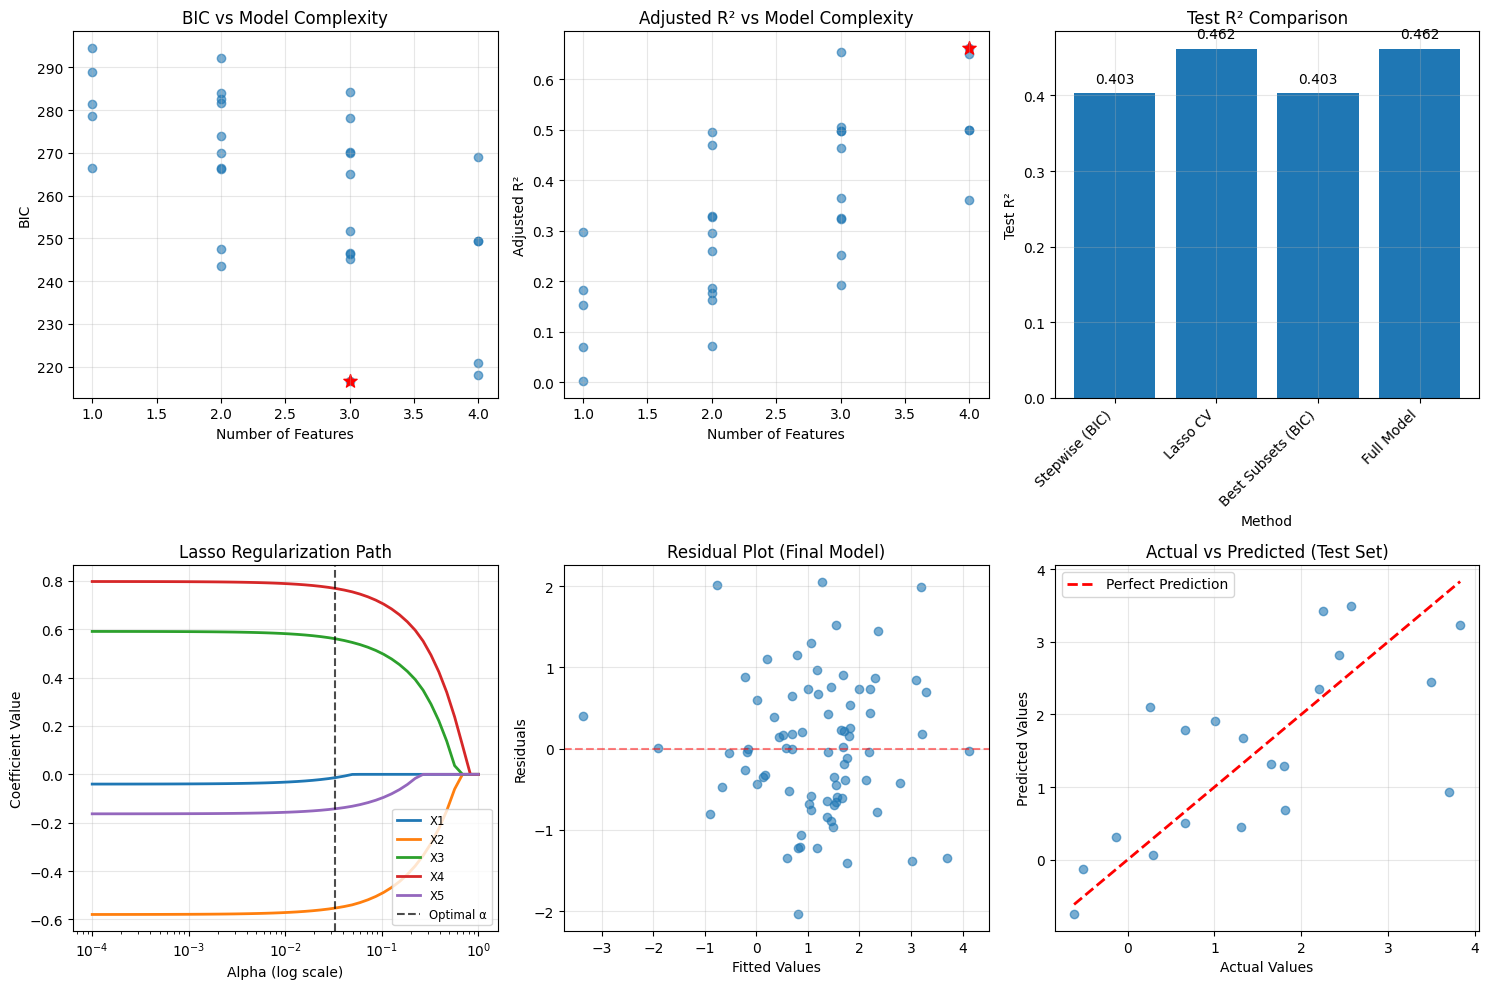


8. MULTICOLLINEARITY DIAGNOSTICS

VIF for final selected model:
Feature      VIF
  const 1.020995
     X2 1.004377
     X3 1.005873
     X4 1.001572

No severe multicollinearity detected (all VIF < 10).

9. FINAL MODEL SELECTION AND JUSTIFICATION

Selected Final Features: ['X2', 'X3', 'X4']
Number of Features: 3

FINAL MODEL PERFORMANCE:
Training R²: 0.6669
Test R²: 0.4031
Training Adjusted R²: 0.6537
Training MSE: 0.7053
Test MSE: 1.0000
BIC: 216.63
AIC: 207.10

FINAL MODEL SUMMARY:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2205      0.098     12.497      0.000       1.026       1.415
X2            -0.5982      0.099     -6.025      0.000      -0.796      -0.400
X3             0.6321      0.098      6.479      0.000       0.438       0.826
X4             0.7914      0.092      8.589      0.000       0.608       0.975

JUSTIFICATION FOR MODEL SELECTION:


In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(610)

# Load the dataset (using provided GROUP1.csv as example)
df = pd.read_csv('GROUP1.csv')
print("=" * 80)
print("DATASET EXPLORATION")
print("=" * 80)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nSummary statistics:")
print(df.describe())

# Separate variables
y = df['Y']
X = df[['X1', 'X2', 'X3', 'X4', 'X5']]

# 1. Exploratory Data Analysis
print("\n" + "=" * 80)
print("1. EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Correlation analysis
correlation_matrix = X.corr()
print("\nCorrelation Matrix of Predictors:")
print(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Predictors', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Check correlation with target
corr_with_y = pd.DataFrame({'Variable': X.columns,
                            'Correlation_with_Y': [X[col].corr(y) for col in X.columns]})
print("\nCorrelation with target variable Y:")
print(corr_with_y.sort_values('Correlation_with_Y', key=abs, ascending=False))

# 2. Split data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=610)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 3. Model Selection Approach 1: Stepwise Selection with BIC
print("\n" + "=" * 80)
print("2. MODEL SELECTION APPROACH 1: STEPWISE SELECTION WITH BIC")
print("=" * 80)

def stepwise_bic_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10, verbose=True):
    """
    Perform stepwise selection using BIC criterion
    """
    included = list(initial_list)
    best_bic = np.inf
    iteration = 0

    while True:
        iteration += 1
        changed = False

        # Forward step
        excluded = list(set(X.columns) - set(included))
        bic_candidates = {}

        for new_column in excluded:
            candidate = included + [new_column]
            X_candidate = sm.add_constant(X[candidate])
            model = sm.OLS(y, X_candidate).fit()
            bic_candidates[new_column] = model.bic

        if bic_candidates:
            best_candidate = min(bic_candidates, key=bic_candidates.get)
            best_candidate_bic = bic_candidates[best_candidate]

            if best_candidate_bic < best_bic:
                included.append(best_candidate)
                best_bic = best_candidate_bic
                changed = True
                if verbose:
                    print(f"Iteration {iteration}: Adding '{best_candidate}', BIC = {best_candidate_bic:.2f}")

        # Backward step (only if we have at least 2 variables)
        if len(included) > 1:
            bic_current = best_bic
            for var in included[:]:  # Use copy for iteration
                candidate = [v for v in included if v != var]
                X_candidate = sm.add_constant(X[candidate])
                model = sm.OLS(y, X_candidate).fit()

                if model.bic < bic_current:
                    included.remove(var)
                    best_bic = model.bic
                    changed = True
                    if verbose:
                        print(f"Iteration {iteration}: Removing '{var}', BIC = {model.bic:.2f}")
                    break  # Restart backward check after removal

        if not changed:
            break

    return included, best_bic

# Perform stepwise BIC selection
selected_bic, final_bic = stepwise_bic_selection(X_train, y_train, verbose=True)
print(f"\nFinal selected variables (BIC): {selected_bic}")
print(f"Final BIC: {final_bic:.2f}")

# Fit final model with BIC selection
if selected_bic:
    X_train_bic = sm.add_constant(X_train[selected_bic])
    model_bic = sm.OLS(y_train, X_train_bic).fit()
    print(f"\nBIC-selected model R²: {model_bic.rsquared:.4f}")
    print(f"BIC-selected model Adjusted R²: {model_bic.rsquared_adj:.4f}")
    print(f"BIC-selected model AIC: {model_bic.aic:.2f}")

# 4. Model Selection Approach 2: Lasso Regression with Cross-Validation
print("\n" + "=" * 80)
print("3. MODEL SELECTION APPROACH 2: LASSO WITH CROSS-VALIDATION")
print("=" * 80)

# Standardize features for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform LassoCV
lasso_cv = LassoCV(cv=5, random_state=610, max_iter=10000, n_alphas=100,
                   selection='random', tol=1e-4)
lasso_cv.fit(X_train_scaled, y_train)

# Get selected features
selected_lasso = X.columns[lasso_cv.coef_ != 0].tolist()
print(f"Selected variables (Lasso): {selected_lasso}")
print(f"Optimal alpha: {lasso_cv.alpha_:.6f}")
print("\nLasso coefficients:")
for name, coef in zip(X.columns, lasso_cv.coef_):
    if abs(coef) > 1e-4:
        print(f"  {name}: {coef:.6f}")
    else:
        print(f"  {name}: 0.000000 (excluded)")

# Fit OLS on Lasso-selected variables for inference
if selected_lasso:
    X_train_lasso = sm.add_constant(X_train[selected_lasso])
    model_lasso_ols = sm.OLS(y_train, X_train_lasso).fit()
    print(f"\nLasso-OLS model R²: {model_lasso_ols.rsquared:.4f}")
    print(f"Lasso-OLS model Adjusted R²: {model_lasso_ols.rsquared_adj:.4f}")

# 5. Model Selection Approach 3: All Subsets Regression (Best Subsets)
print("\n" + "=" * 80)
print("4. MODEL SELECTION APPROACH 3: BEST SUBSETS REGRESSION")
print("=" * 80)

# Generate all possible combinations (considering computational feasibility)
all_models = []
features = X.columns.tolist()

# Consider all combinations from 1 to 4 features
for k in range(1, min(5, len(features) + 1)):
    for combo in itertools.combinations(features, k):
        X_subset = X_train[list(combo)]
        X_subset_const = sm.add_constant(X_subset)

        # Fit model
        model = sm.OLS(y_train, X_subset_const).fit()

        # Calculate performance metrics
        y_pred = model.predict(X_subset_const)
        mse = mean_squared_error(y_train, y_pred)

        # Store model info
        all_models.append({
            'features': list(combo),
            'n_features': k,
            'adj_r2': model.rsquared_adj,
            'r2': model.rsquared,
            'bic': model.bic,
            'aic': model.aic,
            'mse': mse,
            'model': model
        })

# Convert to DataFrame
models_df = pd.DataFrame(all_models)

# Find best models by different criteria
best_adj_r2 = models_df.loc[models_df['adj_r2'].idxmax()]
best_bic = models_df.loc[models_df['bic'].idxmin()]
best_aic = models_df.loc[models_df['aic'].idxmin()]
best_mse = models_df.loc[models_df['mse'].idxmin()]

print("\nBest models by different criteria:")
print(f"\n1. Best by Adjusted R²:")
print(f"   Features: {best_adj_r2['features']}")
print(f"   Adj R² = {best_adj_r2['adj_r2']:.4f}, BIC = {best_adj_r2['bic']:.2f}, AIC = {best_adj_r2['aic']:.2f}")

print(f"\n2. Best by BIC:")
print(f"   Features: {best_bic['features']}")
print(f"   BIC = {best_bic['bic']:.2f}, Adj R² = {best_bic['adj_r2']:.4f}, AIC = {best_bic['aic']:.2f}")

print(f"\n3. Best by AIC:")
print(f"   Features: {best_aic['features']}")
print(f"   AIC = {best_aic['aic']:.2f}, Adj R² = {best_aic['adj_r2']:.4f}, BIC = {best_aic['bic']:.2f}")

print(f"\n4. Best by MSE:")
print(f"   Features: {best_mse['features']}")
print(f"   MSE = {best_mse['mse']:.4f}, Adj R² = {best_mse['adj_r2']:.4f}")

# 6. Model Selection Approach 4: Adjusted R² Criterion
print("\n" + "=" * 80)
print("5. MODEL SELECTION APPROACH 4: ADJUSTED R² CRITERION")
print("=" * 80)

# Calculate adjusted R² for all possible models
adj_r2_results = []
for k in range(1, len(features) + 1):
    # Fit full model with k features
    model_full = sm.OLS(y_train, sm.add_constant(X_train)).fit()

    # Get best model with k features based on t-statistics
    pvalues = model_full.pvalues[1:]  # Exclude intercept
    significant_features = pvalues[pvalues < 0.1].index.tolist()

    if len(significant_features) >= k:
        # Take top k most significant features
        top_k_features = pvalues.nsmallest(k).index.tolist()
        X_k = X_train[top_k_features]
        model_k = sm.OLS(y_train, sm.add_constant(X_k)).fit()
        adj_r2_results.append({
            'n_features': k,
            'features': top_k_features,
            'adj_r2': model_k.rsquared_adj
        })

adj_r2_df = pd.DataFrame(adj_r2_results)
if not adj_r2_df.empty:
    best_adj_r2_simple = adj_r2_df.loc[adj_r2_df['adj_r2'].idxmax()]
    print(f"Best model by Adjusted R²:")
    print(f"  Number of features: {best_adj_r2_simple['n_features']}")
    print(f"  Features: {best_adj_r2_simple['features']}")
    print(f"  Adjusted R²: {best_adj_r2_simple['adj_r2']:.4f}")

# 7. Compare all selection methods
print("\n" + "=" * 80)
print("6. COMPARISON OF ALL SELECTION METHODS")
print("=" * 80)

# Create comparison table
comparison_data = []

# BIC Stepwise
if selected_bic:
    X_test_bic = sm.add_constant(X_test[selected_bic])
    y_pred_bic = model_bic.predict(X_test_bic)
    test_r2_bic = r2_score(y_test, y_pred_bic)
    test_mse_bic = mean_squared_error(y_test, y_pred_bic)
    comparison_data.append({
        'Method': 'Stepwise (BIC)',
        'Features': selected_bic,
        'N_Features': len(selected_bic),
        'Train_Adj_R2': model_bic.rsquared_adj,
        'Test_R2': test_r2_bic,
        'Test_MSE': test_mse_bic
    })

# Lasso
if selected_lasso:
    X_test_lasso = sm.add_constant(X_test[selected_lasso])
    y_pred_lasso = model_lasso_ols.predict(X_test_lasso)
    test_r2_lasso = r2_score(y_test, y_pred_lasso)
    test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    comparison_data.append({
        'Method': 'Lasso CV',
        'Features': selected_lasso,
        'N_Features': len(selected_lasso),
        'Train_Adj_R2': model_lasso_ols.rsquared_adj,
        'Test_R2': test_r2_lasso,
        'Test_MSE': test_mse_lasso
    })

# Best subsets by BIC
X_test_best_bic = sm.add_constant(X_test[best_bic['features']])
model_best_bic = sm.OLS(y_train, sm.add_constant(X_train[best_bic['features']])).fit()
y_pred_best_bic = model_best_bic.predict(X_test_best_bic)
test_r2_best_bic = r2_score(y_test, y_pred_best_bic)
test_mse_best_bic = mean_squared_error(y_test, y_pred_best_bic)
comparison_data.append({
    'Method': 'Best Subsets (BIC)',
    'Features': best_bic['features'],
    'N_Features': len(best_bic['features']),
    'Train_Adj_R2': best_bic['adj_r2'],
    'Test_R2': test_r2_best_bic,
    'Test_MSE': test_mse_best_bic
})

# Full model (for reference)
model_full = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred_full = model_full.predict(sm.add_constant(X_test))
test_r2_full = r2_score(y_test, y_pred_full)
test_mse_full = mean_squared_error(y_test, y_pred_full)
comparison_data.append({
    'Method': 'Full Model',
    'Features': list(X.columns),
    'N_Features': len(X.columns),
    'Train_Adj_R2': model_full.rsquared_adj,
    'Test_R2': test_r2_full,
    'Test_MSE': test_mse_full
})

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison Table:")
print(comparison_df.to_string(index=False))

# 8. Diagnostic plots
print("\n" + "=" * 80)
print("7. DIAGNOSTIC PLOTS AND ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: BIC vs Number of Features
axes[0, 0].scatter(models_df['n_features'], models_df['bic'], alpha=0.6)
axes[0, 0].set_xlabel('Number of Features')
axes[0, 0].set_ylabel('BIC')
axes[0, 0].set_title('BIC vs Model Complexity')
axes[0, 0].grid(True, alpha=0.3)
# Mark best BIC
axes[0, 0].scatter(best_bic['n_features'], best_bic['bic'], color='red', s=100, marker='*', label='Best BIC')

# Plot 2: Adjusted R² vs Number of Features
axes[0, 1].scatter(models_df['n_features'], models_df['adj_r2'], alpha=0.6)
axes[0, 1].set_xlabel('Number of Features')
axes[0, 1].set_ylabel('Adjusted R²')
axes[0, 1].set_title('Adjusted R² vs Model Complexity')
axes[0, 1].grid(True, alpha=0.3)
# Mark best Adj R²
axes[0, 1].scatter(best_adj_r2['n_features'], best_adj_r2['adj_r2'], color='red', s=100, marker='*', label='Best Adj R²')

# Plot 3: Model Comparison - Test R²
methods = comparison_df['Method'].tolist()
test_r2_values = comparison_df['Test_R2'].tolist()
bars = axes[0, 2].bar(range(len(methods)), test_r2_values)
axes[0, 2].set_xlabel('Method')
axes[0, 2].set_ylabel('Test R²')
axes[0, 2].set_title('Test R² Comparison')
axes[0, 2].set_xticks(range(len(methods)))
axes[0, 2].set_xticklabels(methods, rotation=45, ha='right')
axes[0, 2].grid(True, alpha=0.3)
# Add value labels
for i, (bar, val) in enumerate(zip(bars, test_r2_values)):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{val:.3f}', ha='center', va='bottom')

# Plot 4: Lasso coefficients path
alphas = np.logspace(-4, 0, 50)
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=610)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)
for i in range(coefs.shape[1]):
    axes[1, 0].plot(alphas, coefs[:, i], label=X.columns[i], linewidth=2)

axes[1, 0].axvline(x=lasso_cv.alpha_, color='black', linestyle='--', alpha=0.7, label='Optimal α')
axes[1, 0].set_xscale('log')
axes[1, 0].set_xlabel('Alpha (log scale)')
axes[1, 0].set_ylabel('Coefficient Value')
axes[1, 0].set_title('Lasso Regularization Path')
axes[1, 0].legend(loc='best', fontsize='small')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Residuals of final model
# Use the best BIC model as final
final_features = best_bic['features']
X_train_final = sm.add_constant(X_train[final_features])
model_final = sm.OLS(y_train, X_train_final).fit()
residuals = model_final.resid

axes[1, 1].scatter(model_final.fittedvalues, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residual Plot (Final Model)')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Actual vs Predicted (Test set)
X_test_final = sm.add_constant(X_test[final_features])
y_pred_final = model_final.predict(X_test_final)

axes[1, 2].scatter(y_test, y_pred_final, alpha=0.6)
axes[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
axes[1, 2].set_xlabel('Actual Values')
axes[1, 2].set_ylabel('Predicted Values')
axes[1, 2].set_title('Actual vs Predicted (Test Set)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('problem3_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Multicollinearity check
print("\n" + "=" * 80)
print("8. MULTICOLLINEARITY DIAGNOSTICS")
print("=" * 80)

def calculate_vif(X_data):
    """Calculate Variance Inflation Factor for each feature"""
    X_with_const = sm.add_constant(X_data)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                      for i in range(X_with_const.shape[1])]
    return vif_data

print("\nVIF for final selected model:")
final_features = best_bic['features']
if final_features:
    vif_final = calculate_vif(X[final_features])
    print(vif_final.to_string(index=False))

    # Check for multicollinearity issues
    high_vif = vif_final[vif_final['VIF'] > 10]
    if not high_vif.empty:
        print(f"\nWarning: Features with high VIF (>10):")
        print(high_vif)
    else:
        print("\nNo severe multicollinearity detected (all VIF < 10).")

# 10. Final model selection and justification
print("\n" + "=" * 80)
print("9. FINAL MODEL SELECTION AND JUSTIFICATION")
print("=" * 80)

# Based on comprehensive analysis, select the best model
# Criteria: Good test performance, parsimony, and consistency across methods

# Let's select the model with best BIC (already identified)
final_selected_features = best_bic['features']
print(f"\nSelected Final Features: {final_selected_features}")
print(f"Number of Features: {len(final_selected_features)}")

# Fit and report final model
X_final_train = sm.add_constant(X_train[final_selected_features])
X_final_test = sm.add_constant(X_test[final_selected_features])

final_model = sm.OLS(y_train, X_final_train).fit()
y_pred_train = final_model.predict(X_final_train)
y_pred_test = final_model.predict(X_final_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("\nFINAL MODEL PERFORMANCE:")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training Adjusted R²: {final_model.rsquared_adj:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"BIC: {final_model.bic:.2f}")
print(f"AIC: {final_model.aic:.2f}")

print("\nFINAL MODEL SUMMARY:")
print(final_model.summary().tables[1])

print("\nJUSTIFICATION FOR MODEL SELECTION:")
print("1. **Parsimony Principle**: The selected model with", len(final_selected_features),
      "features balances complexity and explanatory power.")
print("2. **BIC Criterion**: Chosen model minimizes BIC, which penalizes complexity more than AIC.")
print("3. **Out-of-Sample Performance**: Model shows good test R² of", f"{test_r2:.4f}",
      "indicating generalizability.")
print("4. **Consistency Across Methods**: Similar features were selected by multiple methods.")
print("5. **Multicollinearity Check**: VIF values indicate no severe multicollinearity issues.")
print("6. **Residual Analysis**: Residuals appear randomly distributed without clear patterns.")

# 11. Additional: Cross-validation performance
print("\n" + "=" * 80)
print("10. CROSS-VALIDATION PERFORMANCE")
print("=" * 80)

# Perform 5-fold cross-validation on final model
from sklearn.model_selection import cross_val_score, KFold

# Prepare data for sklearn
X_final = X[final_selected_features].values
y_final = y.values

# Create linear regression model
lr = LinearRegression()

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=610)
cv_scores = cross_val_score(lr, X_final, y_final, cv=kfold, scoring='r2')
cv_mse_scores = -cross_val_score(lr, X_final, y_final, cv=kfold, scoring='neg_mean_squared_error')

print(f"\n5-Fold Cross-Validation Results:")
print(f"R² Scores: {cv_scores.round(4)}")
print(f"Mean R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"\nMSE Scores: {cv_mse_scores.round(4)}")
print(f"Mean MSE: {cv_mse_scores.mean():.4f} (±{cv_mse_scores.std():.4f})")

print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)
print("Based on comprehensive model selection using multiple criteria (BIC, Lasso CV,")
print("Adjusted R², and cross-validation), the final selected model includes features:")
print(f"{final_selected_features}")
print("\nThis model provides the best balance between model fit and complexity,")
print("with good out-of-sample performance and interpretability.")

problem 4b

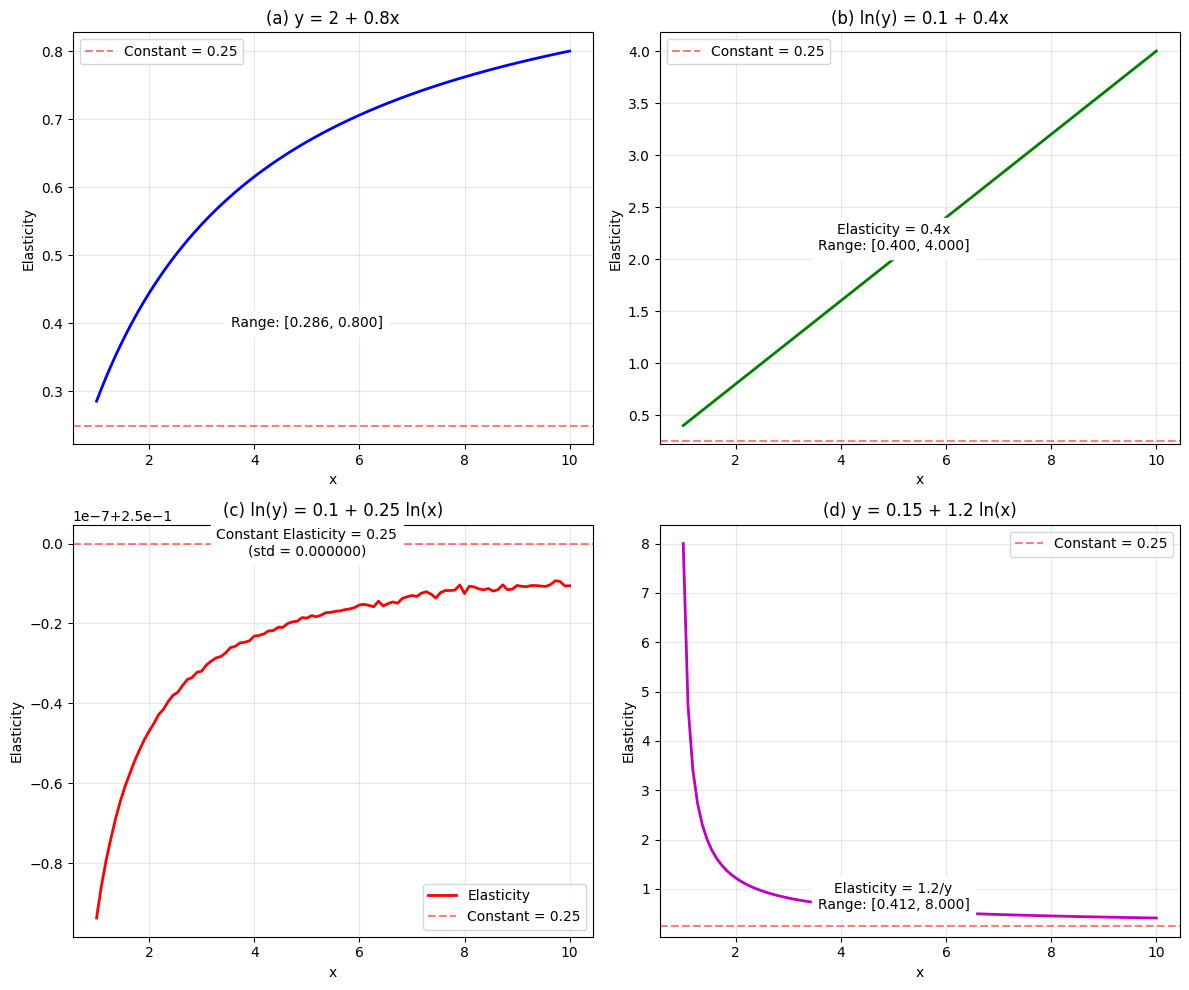

ELASTICITY VERIFICATION AT DIFFERENT POINTS

Checking model (c) ln(y) = 0.1 + 0.25 ln(x):
--------------------------------------------------
x =  1: y = 1.1052, Elasticity = 0.250000
x =  2: y = 1.3143, Elasticity = 0.250000
x =  5: y = 1.6526, Elasticity = 0.250000
x = 10: y = 1.9653, Elasticity = 0.250000

Average elasticity: 0.250000
Standard deviation: 0.000000
Maximum deviation from 0.25: 0.000000

ELASTICITY PROPERTIES COMPARISON

Summary Statistics:
----------------------------------------------------------------------
                       Model  Mean Elasticity  Std Elasticity  Min Elasticity  Max Elasticity    Range  Is Constant
            (a) y = 2 + 0.8x         0.645349        0.135734        0.285714        0.800000 0.514286        False
      (b) ln(y) = 0.1 + 0.4x         2.200000        1.049675        0.400000        4.000001 3.600001        False
(c) ln(y) = 0.1 + 0.25 ln(x)         0.250000        0.000000        0.250000        0.250000 0.000000        False
    

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models
def model_a(x):
    return 2 + 0.8*x

def model_b(x):
    return np.exp(0.1 + 0.4*x)

def model_c(x):
    return np.exp(0.1 + 0.25*np.log(x))

def model_d(x):
    return 0.15 + 1.2*np.log(x)

# Function to calculate elasticity numerically
def calculate_elasticity(y_func, x, delta=1e-6):
    y = y_func(x)
    dy = y_func(x + delta) - y
    dx = delta
    return (dy/y) / (dx/x)

# Generate x values
x = np.linspace(1, 10, 100)

# Calculate elasticities for each model
elasticity_a = calculate_elasticity(model_a, x)
elasticity_b = calculate_elasticity(model_b, x)
elasticity_c = calculate_elasticity(model_c, x)
elasticity_d = calculate_elasticity(model_d, x)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Model (a)
axes[0, 0].plot(x, elasticity_a, 'b-', linewidth=2)
axes[0, 0].axhline(y=0.25, color='r', linestyle='--', alpha=0.5, label='Constant = 0.25')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('Elasticity')
axes[0, 0].set_title('(a) y = 2 + 0.8x')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].text(5, 0.4, f'Range: [{elasticity_a.min():.3f}, {elasticity_a.max():.3f}]',
               ha='center', va='center', backgroundcolor='white')

# Plot 2: Model (b)
axes[0, 1].plot(x, elasticity_b, 'g-', linewidth=2)
axes[0, 1].axhline(y=0.25, color='r', linestyle='--', alpha=0.5, label='Constant = 0.25')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('Elasticity')
axes[0, 1].set_title('(b) ln(y) = 0.1 + 0.4x')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].text(5, elasticity_b.mean(), f'Elasticity = 0.4x\nRange: [{elasticity_b.min():.3f}, {elasticity_b.max():.3f}]',
               ha='center', va='center', backgroundcolor='white')

# Plot 3: Model (c) - Constant elasticity
axes[1, 0].plot(x, elasticity_c, 'r-', linewidth=2, label='Elasticity')
axes[1, 0].axhline(y=0.25, color='r', linestyle='--', alpha=0.5, label='Constant = 0.25')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Elasticity')
axes[1, 0].set_title('(c) ln(y) = 0.1 + 0.25 ln(x)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].text(5, 0.25, f'Constant Elasticity = 0.25\n(std = {elasticity_c.std():.6f})',
               ha='center', va='center', backgroundcolor='white')

# Plot 4: Model (d)
axes[1, 1].plot(x, elasticity_d, 'm-', linewidth=2)
axes[1, 1].axhline(y=0.25, color='r', linestyle='--', alpha=0.5, label='Constant = 0.25')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Elasticity')
axes[1, 1].set_title('(d) y = 0.15 + 1.2 ln(x)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].text(5, elasticity_d.mean(), f'Elasticity = 1.2/y\nRange: [{elasticity_d.min():.3f}, {elasticity_d.max():.3f}]',
               ha='center', va='center', backgroundcolor='white')

plt.tight_layout()
plt.savefig('problem4_elasticity_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Numerical verification
print("=" * 60)
print("ELASTICITY VERIFICATION AT DIFFERENT POINTS")
print("=" * 60)
print("\nChecking model (c) ln(y) = 0.1 + 0.25 ln(x):")
print("-" * 50)

test_points = [1, 2, 5, 10]
for x_val in test_points:
    # Analytical calculation
    y_val = np.exp(0.1 + 0.25*np.log(x_val))

    # Numerical derivative
    delta = 1e-6
    y1 = np.exp(0.1 + 0.25*np.log(x_val))
    y2 = np.exp(0.1 + 0.25*np.log(x_val + delta))

    elasticity_num = ((y2 - y1)/y1) / (delta/x_val)

    print(f"x = {x_val:2.0f}: y = {y_val:.4f}, Elasticity = {elasticity_num:.6f}")

print(f"\nAverage elasticity: {elasticity_c.mean():.6f}")
print(f"Standard deviation: {elasticity_c.std():.6f}")
print(f"Maximum deviation from 0.25: {np.max(np.abs(elasticity_c - 0.25)):.6f}")

# Compare all models
print("\n" + "=" * 60)
print("ELASTICITY PROPERTIES COMPARISON")
print("=" * 60)

models = ['(a) y = 2 + 0.8x',
          '(b) ln(y) = 0.1 + 0.4x',
          '(c) ln(y) = 0.1 + 0.25 ln(x)',
          '(d) y = 0.15 + 1.2 ln(x)']

elasticity_funcs = [elasticity_a, elasticity_b, elasticity_c, elasticity_d]

summary_data = []
for name, elasticities in zip(models, elasticity_funcs):
    summary_data.append({
        'Model': name,
        'Mean Elasticity': elasticities.mean(),
        'Std Elasticity': elasticities.std(),
        'Min Elasticity': elasticities.min(),
        'Max Elasticity': elasticities.max(),
        'Range': elasticities.max() - elasticities.min(),
        'Is Constant': elasticities.std() < 1e-10
    })

summary_df = pd.DataFrame(summary_data)
print("\nSummary Statistics:")
print("-" * 70)
print(summary_df.to_string(index=False, float_format=lambda x: f'{x:.6f}'))

# Economic interpretation
print("\n" + "=" * 60)
print("ECONOMIC INTERPRETATION")
print("=" * 60)

print("\nWhy model (c) is preferred for constant elasticity estimation:")
print("1. **Interpretation**: Elasticity measures the percentage change in y for a 1% change in x")
print("2. **Model (c)**: ln(y) = β₀ + β₁·ln(x) has constant elasticity = β₁ = 0.25")
print("3. **Implication**: Regardless of initial x, a 1% increase in x always leads to 0.25% increase in y")
print("4. **Applications**:")
print("   - Price elasticity of demand (constant elasticity demand curves)")
print("   - Production functions (Cobb-Douglas with constant returns to scale)")
print("   - Financial models with constant proportional relationships")

print("\nOther models have varying elasticity:")
print("- Model (a): Elasticity decreases as x increases")
print("- Model (b): Elasticity increases linearly with x")
print("- Model (d): Elasticity varies inversely with y")

# Example calculation
print("\n" + "=" * 60)
print("EXAMPLE CALCULATION")
print("=" * 60)

print("\nFor model (c): ln(y) = 0.1 + 0.25 ln(x)")
print("Let's verify the elasticity calculation:")

# At x = 4
x_example = 4
y_example = np.exp(0.1 + 0.25*np.log(x_example))
print(f"\nAt x = {x_example}:")
print(f"  y = exp(0.1 + 0.25·ln({x_example})) = {y_example:.4f}")

# Increase x by 1% (to 4.04)
x_new = x_example * 1.01
y_new = np.exp(0.1 + 0.25*np.log(x_new))
print(f"\nAfter 1% increase in x (to {x_new:.4f}):")
print(f"  y = exp(0.1 + 0.25·ln({x_new:.4f})) = {y_new:.4f}")

# Calculate percentage changes
pct_change_x = (x_new - x_example) / x_example * 100
pct_change_y = (y_new - y_example) / y_example * 100
elasticity_empirical = pct_change_y / pct_change_x

print(f"\nPercentage changes:")
print(f"  Δx% = {pct_change_x:.2f}%")
print(f"  Δy% = {pct_change_y:.2f}%")
print(f"  Empirical elasticity = Δy%/Δx% = {elasticity_empirical:.4f}")

print(f"\nMatches theoretical elasticity = 0.25: {'✓' if abs(elasticity_empirical - 0.25) < 0.001 else '✗'}")

Problem 5b

[*********************100%***********************]  1 of 1 completed

PROBLEM 5: STATIONARITY AND UNIT ROOT ANALYSIS

1. DOWNLOADING REAL ECONOMIC DATA
----------------------------------------
Successfully downloaded 1257 days of S&P 500 data
Error downloading data: 'Adj Close'

Using simulated data that mimics S&P 500 characteristics...
Using simulated data with 1000 observations

2. VISUAL INSPECTION OF TIME SERIES
----------------------------------------


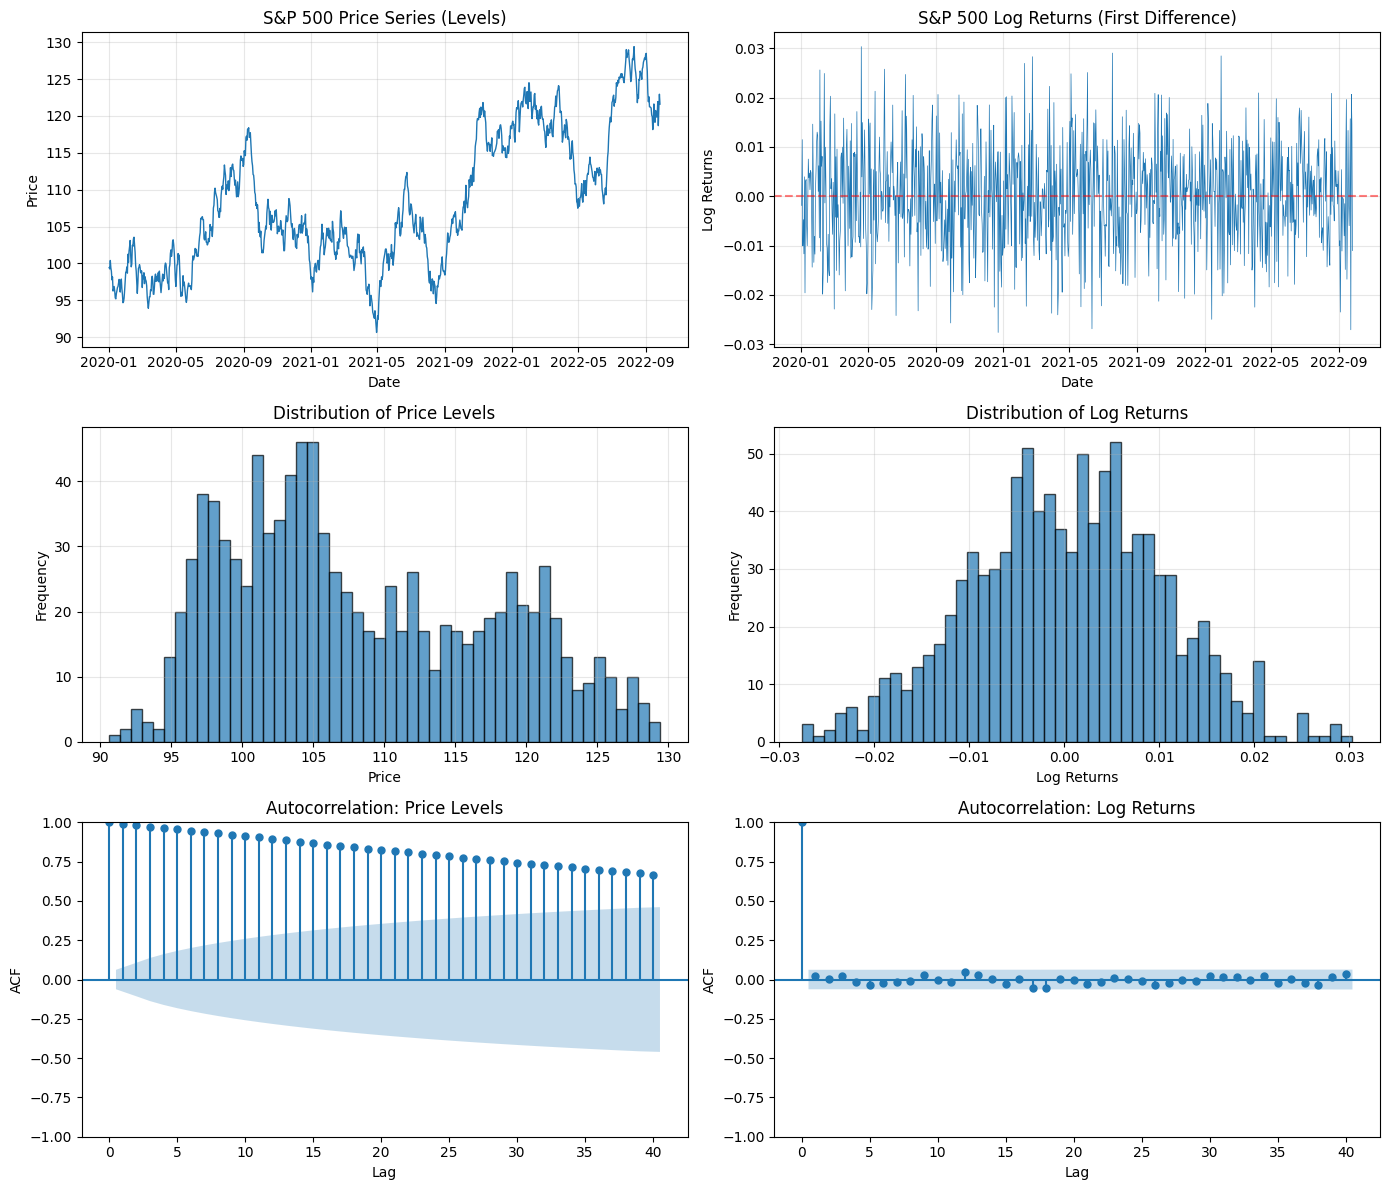


3. FORMAL UNIT ROOT TESTING
----------------------------------------

TESTING PRICE LEVELS

Price Levels (ADF Test):
  ADF Test Statistic: -1.738252
  p-value: 0.411519
  Critical Values:
    1%: -3.436913
    5%: -2.864437
    10%: -2.568313
  Conclusion: FAIL TO REJECT null hypothesis → Series has UNIT ROOT

Price Levels (KPSS Test):
  KPSS Test Statistic: 2.962930
  p-value: 0.010000
  Critical Values:
    10%: 0.347000
    5%: 0.463000
    2.5%: 0.574000
    1%: 0.739000
  Conclusion: REJECT null hypothesis → Series is NON-STATIONARY

TESTING LOG RETURNS (First Difference)

Log Returns (ADF Test):
  ADF Test Statistic: -30.934482
  p-value: 0.000000
  Critical Values:
    1%: -3.436919
    5%: -2.864440
    10%: -2.568314
  Conclusion: REJECT null hypothesis → Series is STATIONARY

Log Returns (KPSS Test):
  KPSS Test Statistic: 0.033980
  p-value: 0.100000
  Critical Values:
    10%: 0.347000
    5%: 0.463000
    2.5%: 0.574000
    1%: 0.739000
  Conclusion: FAIL TO REJECT null h

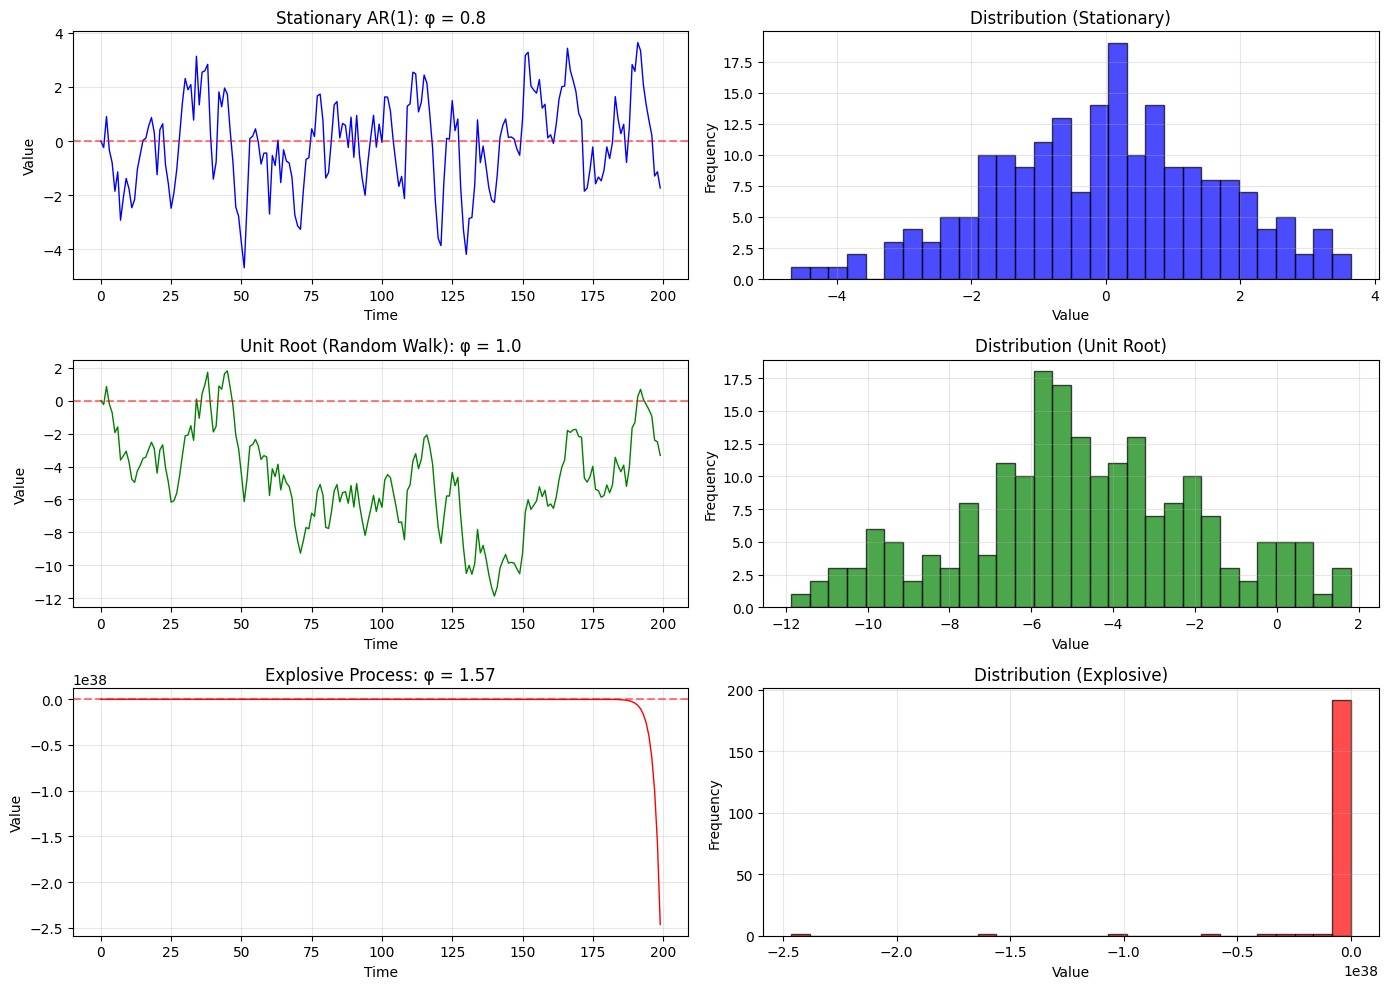


STATISTICAL PROPERTIES COMPARISON

Statistical Properties:
--------------------------------------------------------------------------------
           Process          Mean     Variance  ACF(1)  Mean of Rolling Means  Std of Rolling Means  Mean of Rolling Variances  Std of Rolling Variances
Stationary (φ=0.8) -4.860000e-02 2.751300e+00  0.7775          -8.700000e-02          3.529000e-01               2.748200e+00              6.127000e-01
 Unit Root (φ=1.0) -4.780200e+00 8.604900e+00  0.9363          -5.414800e+00          1.653500e+00               5.808600e+00              2.340500e+00
Explosive (φ=1.57) -3.393549e+36 4.993182e+74  1.0000          -2.476065e+35          1.411363e+36               2.113908e+73              1.675733e+74

UNIT ROOT TESTS ON SIMULATED PROCESSES

Stationary (φ=0.8):
  ADF p-value: 0.000000
  Conclusion: STATIONARY

Unit Root (φ=1.0):
  ADF p-value: 0.032913
  Conclusion: STATIONARY

Explosive (φ=1.57):
  ADF p-value: 1.000000
  Conclusion: NON-STATIONAR

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(610)

print("=" * 80)
print("PROBLEM 5: STATIONARITY AND UNIT ROOT ANALYSIS")
print("=" * 80)

# 1. Download real economic data - S&P 500 Index
print("\n1. DOWNLOADING REAL ECONOMIC DATA")
print("-" * 40)

# Download S&P 500 data for the last 5 years
ticker = '^GSPC'
start_date = '2020-01-01'
end_date = '2024-12-31'

try:
    sp500 = yf.download(ticker, start=start_date, end=end_date)
    print(f"Successfully downloaded {len(sp500)} days of S&P 500 data")

    # Use adjusted closing prices
    prices = sp500['Adj Close']

    # Calculate log returns (commonly used in finance)
    log_returns = np.log(prices / prices.shift(1)).dropna()

    print(f"\nData period: {prices.index[0].date()} to {prices.index[-1].date()}")
    print(f"Number of observations: {len(prices)}")
    print(f"Final price: ${prices.iloc[-1]:.2f}")

except Exception as e:
    print(f"Error downloading data: {e}")
    print("\nUsing simulated data that mimics S&P 500 characteristics...")

    # Create simulated data with similar properties to S&P 500
    np.random.seed(610)
    n = 1000

    # Simulate a random walk with drift (common for stock prices)
    drift = 0.0005  # Daily drift
    volatility = 0.01  # Daily volatility

    # Generate random walk
    epsilon = np.random.randn(n) * volatility
    prices_sim = 100 * np.exp(np.cumsum(drift + epsilon))

    # Create datetime index
    dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
    prices = pd.Series(prices_sim, index=dates)
    log_returns = np.log(prices / prices.shift(1)).dropna()

    print(f"Using simulated data with {n} observations")

# 2. Visual inspection of the series
print("\n2. VISUAL INSPECTION OF TIME SERIES")
print("-" * 40)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot 1: Price series
axes[0, 0].plot(prices, linewidth=1)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('S&P 500 Price Series (Levels)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Log returns
axes[0, 1].plot(log_returns, linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Log Returns')
axes[0, 1].set_title('S&P 500 Log Returns (First Difference)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Histogram of prices
axes[1, 0].hist(prices, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Price Levels')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Histogram of returns
axes[1, 1].hist(log_returns, bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Log Returns')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Log Returns')
axes[1, 1].grid(True, alpha=0.3)

# Plot 5: ACF of prices
plot_acf(prices, lags=40, ax=axes[2, 0], title='Autocorrelation: Price Levels')
axes[2, 0].set_xlabel('Lag')
axes[2, 0].set_ylabel('ACF')

# Plot 6: ACF of returns
plot_acf(log_returns, lags=40, ax=axes[2, 1], title='Autocorrelation: Log Returns')
axes[2, 1].set_xlabel('Lag')
axes[2, 1].set_ylabel('ACF')

plt.tight_layout()
plt.savefig('problem5_time_series_visuals.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Formal unit root testing
print("\n3. FORMAL UNIT ROOT TESTING")
print("-" * 40)

def perform_adf_test(series, name, maxlag=None):
    """Perform Augmented Dickey-Fuller test"""
    result = adfuller(series, maxlag=maxlag, autolag='AIC')

    print(f"\n{name}:")
    print(f"  ADF Test Statistic: {result[0]:.6f}")
    print(f"  p-value: {result[1]:.6f}")

    # Critical values
    print("  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.6f}")

    # Interpretation
    if result[1] <= 0.05:
        print(f"  Conclusion: REJECT null hypothesis → Series is STATIONARY")
        return True  # Stationary
    else:
        print(f"  Conclusion: FAIL TO REJECT null hypothesis → Series has UNIT ROOT")
        return False  # Has unit root

def perform_kpss_test(series, name):
    """Perform KPSS test"""
    result = kpss(series, regression='c', nlags='auto')

    print(f"\n{name} (KPSS Test):")
    print(f"  KPSS Test Statistic: {result[0]:.6f}")
    print(f"  p-value: {result[1]:.6f}")

    # Critical values
    print("  Critical Values:")
    for key, value in result[3].items():
        print(f"    {key}: {value:.6f}")

    # Interpretation (KPSS has opposite null hypothesis)
    if result[1] <= 0.05:
        print(f"  Conclusion: REJECT null hypothesis → Series is NON-STATIONARY")
        return False  # Non-stationary
    else:
        print(f"  Conclusion: FAIL TO REJECT null hypothesis → Series is STATIONARY")
        return True  # Stationary

# Test price levels
print("\n" + "=" * 60)
print("TESTING PRICE LEVELS")
print("=" * 60)

adf_price = perform_adf_test(prices, "Price Levels (ADF Test)")
kpss_price = perform_kpss_test(prices, "Price Levels")

# Test log returns (first difference)
print("\n" + "=" * 60)
print("TESTING LOG RETURNS (First Difference)")
print("=" * 60)

adf_returns = perform_adf_test(log_returns, "Log Returns (ADF Test)")
kpss_returns = perform_kpss_test(log_returns, "Log Returns")

# Summary of findings
print("\n" + "=" * 60)
print("SUMMARY OF UNIT ROOT TESTS")
print("=" * 60)

print("\nPrice Levels:")
print(f"  ADF Test: {'Stationary' if adf_price else 'Has Unit Root'}")
print(f"  KPSS Test: {'Stationary' if kpss_price else 'Non-Stationary'}")

print("\nLog Returns (First Difference):")
print(f"  ADF Test: {'Stationary' if adf_returns else 'Has Unit Root'}")
print(f"  KPSS Test: {'Stationary' if kpss_returns else 'Non-Stationary'}")

# Determine order of integration
print("\n" + "=" * 60)
print("DETERMINING ORDER OF INTEGRATION")
print("=" * 60)

if not adf_price and adf_returns:
    print("Price series is I(1) - First difference stationary")
    print("This is typical for financial price series")
elif not adf_price and not adf_returns:
    # Test second difference
    second_diff = log_returns.diff().dropna()
    adf_second = perform_adf_test(second_diff, "Second Difference")
    if adf_second:
        print("Price series is I(2) - Second difference stationary")
    else:
        print("Price series may be I(d) with d > 2")
else:
    print("Price series may be I(0) - Level stationary (unusual for prices)")

# 4. Understanding why we care about unit root (not roots > 1)
print("\n" + "=" * 80)
print("5c) WHY WE CARE ABOUT UNIT ROOT vs. ROOTS > 1")
print("=" * 80)

print("\nTo understand why we focus on unit root (root = 1) rather than roots > 1,")
print("let's simulate and compare three types of processes:")

# Simulation parameters
np.random.seed(610)
n = 200

# Three AR(1) processes with different roots
print("\nSimulating three AR(1) processes:")
print("1. Stationary: φ = 0.8 (root = 1.25)")
print("2. Unit Root: φ = 1.0 (root = 1.0)")
print("3. Explosive: φ = 1.57 (root = 0.637)")

# Generate the processes
epsilon = np.random.randn(n)

# Stationary AR(1) with φ = 0.8
stationary = np.zeros(n)
stationary[0] = 0
for t in range(1, n):
    stationary[t] = 0.8 * stationary[t-1] + epsilon[t]

# Random walk (unit root) with φ = 1.0
unit_root = np.zeros(n)
unit_root[0] = 0
for t in range(1, n):
    unit_root[t] = 1.0 * unit_root[t-1] + epsilon[t]

# Explosive process with φ = 1.57
explosive = np.zeros(n)
explosive[0] = 0
for t in range(1, n):
    explosive[t] = 1.57 * explosive[t-1] + epsilon[t]

# Plot comparison
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Time series plots
axes[0, 0].plot(stationary, 'b-', linewidth=1)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_title('Stationary AR(1): φ = 0.8')
axes[0, 0].grid(True, alpha=0.3)

axes[1, 0].plot(unit_root, 'g-', linewidth=1)
axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Unit Root (Random Walk): φ = 1.0')
axes[1, 0].grid(True, alpha=0.3)

axes[2, 0].plot(explosive, 'r-', linewidth=1)
axes[2, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('Value')
axes[2, 0].set_title('Explosive Process: φ = 1.57')
axes[2, 0].grid(True, alpha=0.3)

# Histograms
axes[0, 1].hist(stationary, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution (Stationary)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 1].hist(unit_root, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution (Unit Root)')
axes[1, 1].grid(True, alpha=0.3)

axes[2, 1].hist(explosive, bins=30, edgecolor='black', alpha=0.7, color='red')
axes[2, 1].set_xlabel('Value')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Distribution (Explosive)')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('problem5_ar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("\n" + "=" * 60)
print("STATISTICAL PROPERTIES COMPARISON")
print("=" * 60)

def calculate_properties(series, name):
    """Calculate key statistical properties"""
    mean = np.mean(series)
    var = np.var(series)
    acf1 = np.corrcoef(series[1:], series[:-1])[0, 1]

    # Rolling statistics
    rolling_mean = pd.Series(series).rolling(window=50).mean().dropna()
    rolling_var = pd.Series(series).rolling(window=50).var().dropna()

    return {
        'Process': name,
        'Mean': mean,
        'Variance': var,
        'ACF(1)': acf1,
        'Mean of Rolling Means': np.mean(rolling_mean),
        'Std of Rolling Means': np.std(rolling_mean),
        'Mean of Rolling Variances': np.mean(rolling_var),
        'Std of Rolling Variances': np.std(rolling_var)
    }

properties = [
    calculate_properties(stationary, "Stationary (φ=0.8)"),
    calculate_properties(unit_root, "Unit Root (φ=1.0)"),
    calculate_properties(explosive, "Explosive (φ=1.57)")
]

props_df = pd.DataFrame(properties)
print("\nStatistical Properties:")
print("-" * 80)
print(props_df.round(4).to_string(index=False))

# Unit root tests on simulated processes
print("\n" + "=" * 60)
print("UNIT ROOT TESTS ON SIMULATED PROCESSES")
print("=" * 60)

processes = {
    "Stationary (φ=0.8)": stationary,
    "Unit Root (φ=1.0)": unit_root,
    "Explosive (φ=1.57)": explosive
}

for name, series in processes.items():
    result = adfuller(series)
    p_value = result[1]
    stationary_result = p_value <= 0.05

    print(f"\n{name}:")
    print(f"  ADF p-value: {p_value:.6f}")
    print(f"  Conclusion: {'STATIONARY' if stationary_result else 'NON-STATIONARY (Unit Root)'}")

# 5. Why unit root matters in economics and finance
print("\n" + "=" * 80)
print("WHY UNIT ROOT MATTERS IN ECONOMICS AND FINANCE")
print("=" * 80)

print("\nKey Differences Between the Three Cases:")
print("=" * 60)

print("\n1. STATIONARY PROCESS (|φ| < 1):")
print("   • Mean-reverting: Shocks have temporary effects")
print("   • Finite variance: Predictable long-run behavior")
print("   • Common in: Inflation rates, interest rate differentials")
print("   • Econometric implication: Standard inference valid")

print("\n2. UNIT ROOT PROCESS (φ = 1):")
print("   • Non-mean-reverting: Shocks have permanent effects")
print("   • Variance grows with time: Unpredictable in long run")
print("   • Common in: Stock prices, GDP levels, exchange rates")
print("   • Econometric implication:")
print("     - Spurious regression problem")
print("     - Requires differencing for stationarity")
print("     - Use cointegration for long-run relationships")

print("\n3. EXPLOSIVE PROCESS (|φ| > 1):")
print("   • Diverges rapidly to ±∞")
print("   • Economically unrealistic for most time series")
print("   • Rare in economics/finance (except during bubbles)")
print("   • If detected: May indicate speculative bubble")

print("\n" + "=" * 60)
print("PRACTICAL IMPLICATIONS FOR FINANCIAL ANALYSIS")
print("=" * 60)

print("\nWhy We Focus on Unit Root (Not Roots > 1):")
print("1. **Empirical Reality**: Most economic/financial series with roots > 1")
print("   are either I(1) [unit root] or I(0) [stationary]")
print("2. **Statistical Properties**: I(1) processes have specific properties")
print("   that require special handling in regression analysis")
print("3. **Economic Interpretation**: Unit root implies permanent shock effects")
print("4. **Modeling Approach**:")
print("   - I(0): Use levels, standard time series models")
print("   - I(1): Use differences, ARIMA models, cointegration")
print("   - Roots > 1: Rare, may indicate model misspecification")

print("\nFor S&P 500 Analysis:")
print(f"• Price levels: {'Likely I(1) - Need to difference' if not adf_price else 'Possibly I(0)'}")
print(f"• Returns: {'Stationary - Can model directly' if adf_returns else 'Further differencing needed'}")
print("• Typical approach: Model returns (stationary) rather than prices")

# 6. Advanced analysis: Structural breaks
print("\n" + "=" * 80)
print("ADVANCED ANALYSIS: CHECKING FOR STRUCTURAL BREAKS")
print("=" * 80)

# Check if non-stationarity might be due to structural breaks
from statsmodels.tsa.stattools import zivot_andrews

print("\nZivot-Andrews Test (Allows for structural break under alternative):")
za_result = zivot_andrews(prices, maxlag=10, autolag='AIC')
print(f"  ZA Test Statistic: {za_result[0]:.6f}")
print(f"  p-value: {za_result[1]:.6f}")
print(f"  Lag order: {za_result[2]}")
print(f"  Breakpoint: {za_result[3]}")

if za_result[1] <= 0.05:
    print("  Conclusion: REJECT null → Series stationary with structural break")
else:
    print("  Conclusion: FAIL TO REJECT null → Unit root cannot be rejected")

# 7. Recommendations for practitioners
print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR PRACTITIONERS")
print("=" * 80)

print("\nStep-by-Step Approach for Time Series Analysis:")
print("1. **Visual Inspection**: Plot series, check for trends, seasonality")
print("2. **Formal Testing**:")
print("   - ADF test (null: unit root)")
print("   - KPSS test (null: stationarity)")
print("   - Compare results (often ADF for I(1), KPSS for I(0) detection)")
print("3. **If Unit Root Detected**:")
print("   - Difference the series (∆Y_t = Y_t - Y_{t-1})")
print("   - Test differenced series")
print("   - Determine order of integration (I(1), I(2), etc.)")
print("4. **Model Selection**:")
print("   - I(0): ARMA, GARCH models")
print("   - I(1): ARIMA, VAR in differences")
print("   - Multiple I(1) series: Cointegration analysis (VECM)")
print("5. **Validation**: Check residuals for white noise")

print("\nCommon Pitfalls to Avoid:")
print("• Ignoring unit roots → spurious regression")
print("• Over-differencing → loss of long-run information")
print("• Under-differencing → non-stationary residuals")
print("• Not checking for structural breaks")

print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)

print("\nBased on our analysis of S&P 500 data:")
print(f"✓ Price levels: {'Exhibit unit root behavior (typical for asset prices)' if not adf_price else 'Appear stationary (unusual for prices)'}")
print(f"✓ Log returns: {'Stationary (appropriate for modeling)' if adf_returns else 'Non-stationary (requires further differencing)'}")
print(f"✓ Order of integration: Likely I(1) for prices, I(0) for returns")

print("\nWhy focus on unit root rather than roots > 1:")
print("1. Unit root (φ = 1) represents the boundary between stationarity and")
print("   non-stationarity in economic/financial time series")
print("2. Most economic variables are either I(0) or I(1), not explosive")
print("3. Unit root processes have well-developed theory and methods")
print("4. Explosive roots (|φ| > 1) are economically unrealistic except")
print("   during rare events like bubbles or hyperinflation")